# Figure 8. Color report error distributions for all set sizes

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data import load_data
from vis import DISC_EDGES, plot_error_by_set_size, plot_error_by_response_stacked, plot_error_by_response_ecdf, set_axes_labels, set_export_style, plot_paired_error_by_set_size, set_axes_aspect, paired_hist, set_axes_rad, plot_paired_error_by_response

save_fig = False

### Figure 8A. Continuous error distributions

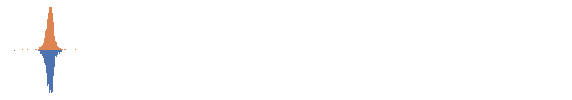

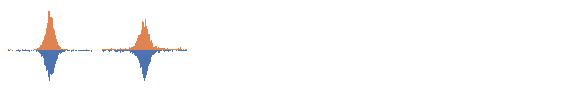

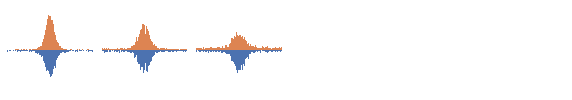

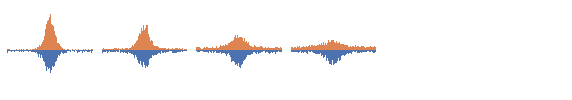

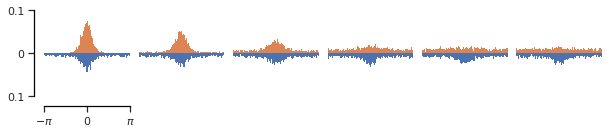

In [15]:
# errors by response (continuous)
modality = 'color'
dataset = 'continuous'

df_all = load_data(modality=modality, dataset=dataset)
set_sizes = np.sort(df_all['set_size'].unique())

for set_size in set_sizes:
    df_free = df_all[(df_all['set_size'] == set_size) &
                     (df_all['condition'] == 'free')]
    df_rand = df_all[(df_all['set_size'] == set_size) &
                     (df_all['condition'] == 'rand')]

    fig, axes = plot_paired_error_by_response(df_free, df_rand,    
                                              bins=90,
                                              subplot_fill=max(set_sizes))

    for ax in axes:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_ylim(-.1, .1)

    if set_size == max(set_sizes):
        axes[0].set_yticks([-.1, 0, .1])
        axes[0].set_yticklabels([.1, 0, .1])
        axes[0].set_xticks([-np.pi, 0, np.pi])
        axes[0].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
        axes[0].spines['left'].set_visible(True)
        axes[0].spines['left'].set_position(('outward',10))
        axes[0].spines['bottom'].set_visible(True)
        axes[0].spines['bottom'].set_position(('outward',10))
        axes[0].set_ylim(-.1, .1)

    set_axes_aspect(fig, axes)
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))
    plt.subplots_adjust(wspace=0.1)

    if save_fig:
        savename = f'../figures/fig_S01_response_error_continuous_ss_{set_size}.png'
        plt.savefig(savename, bbox_inches='tight', dpi=800)

    plt.show()

### Figure 8B. Discrete error distributions

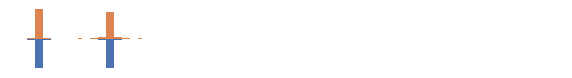

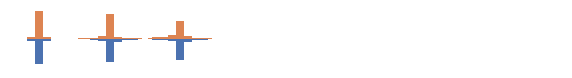

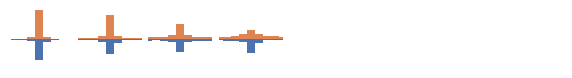

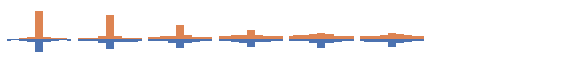

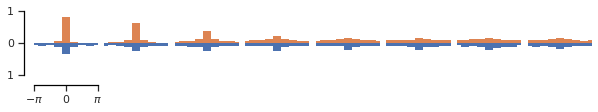

In [14]:
# errors by response (discrete)
modality = 'color'
dataset = 'discrete'

df_all = load_data(modality=modality, dataset=dataset)
set_sizes = np.sort(df_all['set_size'].unique())

for set_size in set_sizes:
    df_free = df_all[(df_all['set_size'] == set_size) &
                     (df_all['condition'] == 'free')]
    df_rand = df_all[(df_all['set_size'] == set_size) &
                     (df_all['condition'] == 'rand')]

    fig, axes = plot_paired_error_by_response(df_free, df_rand,    
                                              bins=DISC_EDGES,
                                              split_pi=True,
                                              subplot_fill=max(set_sizes))

    for ax in axes:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_ylim(-1,1)

    if set_size == max(set_sizes):
        axes[0].set_yticks([-1, 0, 1])
        axes[0].set_yticklabels([1, 0, 1])
        axes[0].set_xticks([-np.pi, 0, np.pi])
        axes[0].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
        axes[0].spines['left'].set_visible(True)
        axes[0].spines['left'].set_position(('outward',10))
        axes[0].spines['bottom'].set_visible(True)
        axes[0].spines['bottom'].set_position(('outward',10))
        axes[0].set_ylim(-1, 1)

    set_axes_aspect(fig, axes)
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))
    plt.subplots_adjust(wspace=0.1)

    if save_fig:
        savename = f'../figures/fig_S01_response_error_discrete_ss_{set_size}.png'
        plt.savefig(savename, bbox_inches='tight', dpi=800)

    plt.show()